In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/population-data-india/india_population.csv
/kaggle/input/population-data-india/population_indian_cities.csv
/kaggle/input/population-data-india/india_population_forecast.csv


In [4]:
df = pd.read_csv('/kaggle/input/population-data-india/india_population.csv')

In [5]:
df.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,0.99,13586631,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2019,1366417754,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71,7713468100,2
2,2018,1352642280,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73,7631091040,2
3,2017,1338676785,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74,7547858925,2
4,2016,1324517249,1.10,14364846,-532687,27.1,2.36,445,33.2,439391699,17.75,7464022049,2


In [6]:
df.info

<bound method DataFrame.info of     Year  Population  Yearly % Change  Yearly Change  Migrants (net)  \
0   2020  1380004385             0.99       13586631         -532687   
1   2019  1366417754             1.02       13775474         -532687   
2   2018  1352642280             1.04       13965495         -532687   
3   2017  1338676785             1.07       14159536         -532687   
4   2016  1324517249             1.10       14364846         -532687   
5   2015  1310152403             1.20       15174247         -470015   
6   2010  1234281170             1.47       17334249         -531169   
7   2005  1147609927             1.67       18206876         -377797   
8   2000  1056575549             1.85       18530592         -136514   
9   1995   963922588             1.99       18128958         -110590   
10  1990   873277798             2.17       17783558            9030   
11  1985   784360008             2.33       17081433          115942   
12  1980   698952844            

In [7]:
df.isnull().sum()

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
India Global Rank               0
dtype: int64

In [8]:
df.set_index('Year', inplace = True)

**India's Population from 1955**

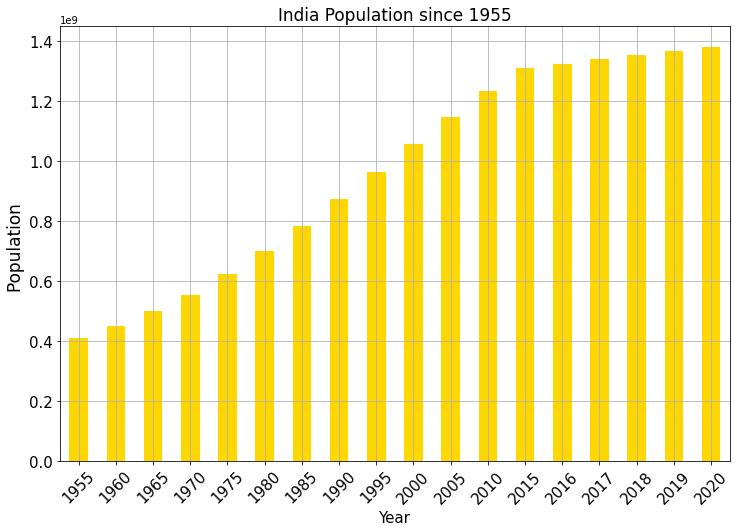

In [10]:
df['Population'].sort_values(ascending = True).plot(kind='bar', rot = 45, color = 'gold', 
            figsize = (12,8), grid = True, fontsize = 15)
plt.title('India Population since 1955', fontsize = 17)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Population ', fontsize = 17)
plt.show()

**Indian Population compared to World Population**

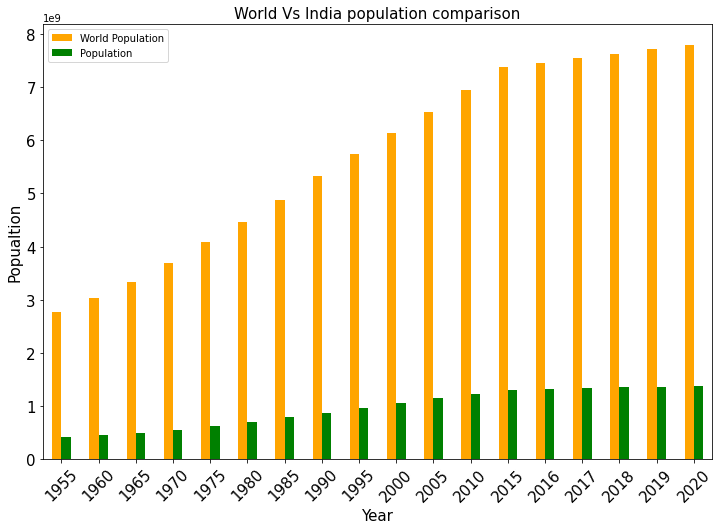

In [23]:
df[['World Population','Population']].sort_values('Population',ascending = True).plot(kind='bar', rot = 45, color = ['orange','green'], 
            figsize = (12,8), fontsize = 15)
plt.title('World Vs India population comparison', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Popualtion', fontsize = 15)
plt.show()

**India's Population when compared to World's Population in Percentange**

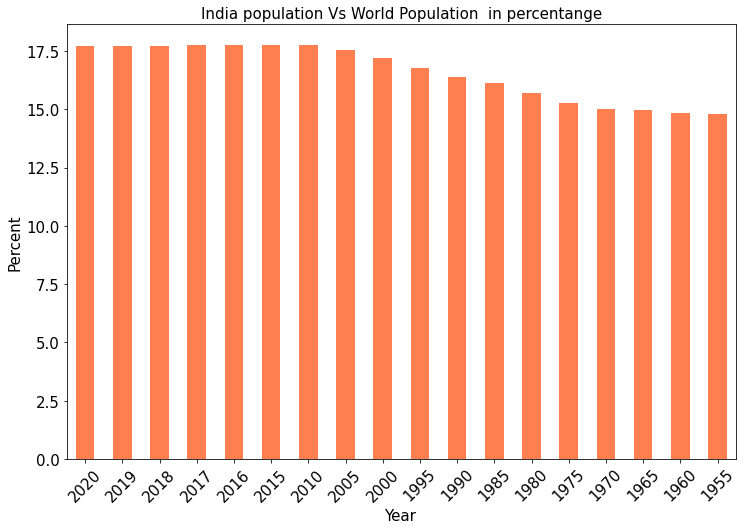

In [21]:
df['percent'] = df['Population']/df['World Population']*100
df['percent'].plot(kind='bar', rot = 45, color = 'coral', 
            figsize = (12,8), fontsize = 15)
plt.title('India population Vs World Population  in percentange', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percent', fontsize = 15)
plt.show()

**Urban Population growth when compared to World Population**

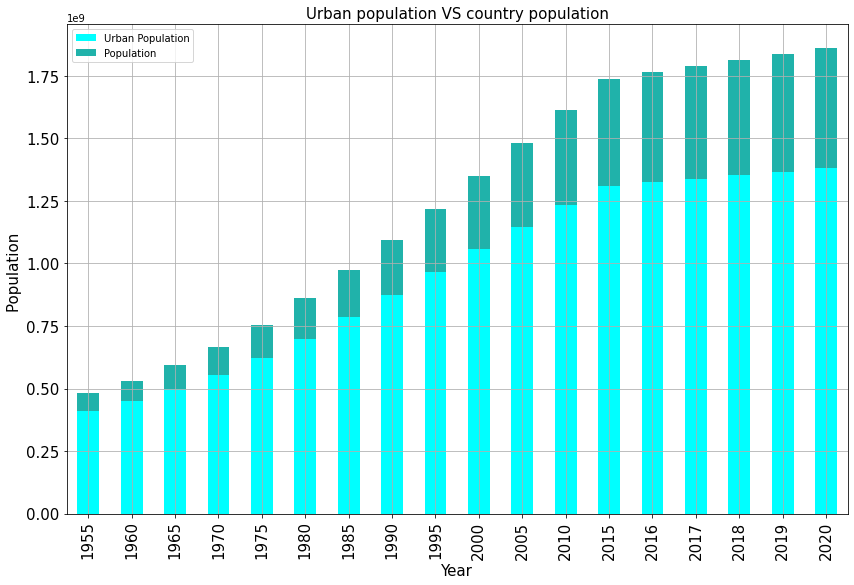

In [29]:
df[['Population','Urban Population']].sort_values('Population', ascending = True).plot.bar(stacked=True, color = ['cyan','lightseagreen'],
        figsize = (14,9), grid = True, fontsize = 15)
plt.title('Urban population VS country population', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Population ', fontsize = 15)
plt.legend(['Urban Population','Population'])
plt.show()

**Number Of migrants in following years**

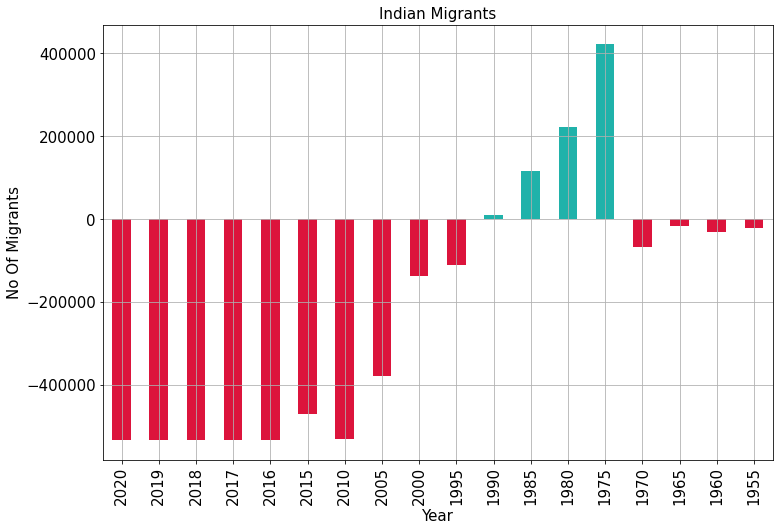

In [36]:
df['positive'] = df['Migrants (net)'] < 0
df['Migrants (net)'].plot(kind = 'bar', 
            color = df.positive.map({True: 'crimson', False: 'lightseagreen'}), grid = True,
            figsize = (12,8), fontsize = 15)
plt.title('Indian Migrants', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('No Of Migrants', fontsize = 15)
plt.show()

**Yearly Change in population**

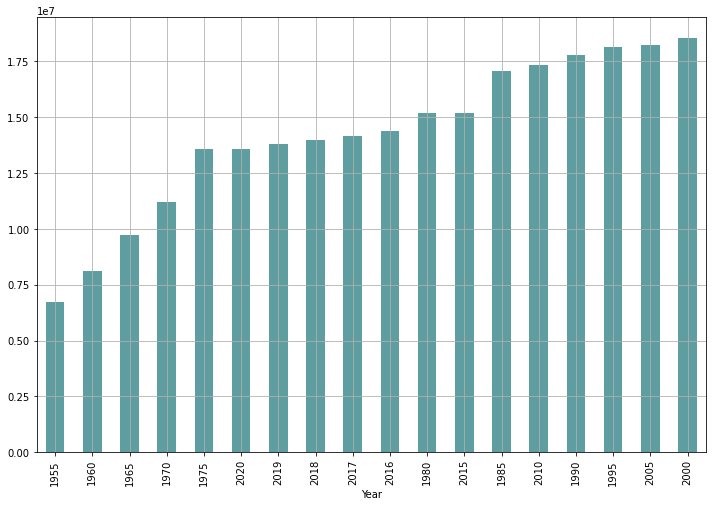

In [38]:
df['Yearly Change'].sort_values(ascending = True).plot(kind = 'bar', 
            color = ['cadetblue'], grid = True,
            figsize = (12,8))
plt.show()

In [40]:
df1 = pd.read_csv('/kaggle/input/population-data-india/india_population_forecast.csv')

In [41]:
df1.head()

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,1.04,13970396,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2025,1445011620,0.92,13001447,-464081,30.0,2.24,486,37.6,542742539,17.66,8184437460,2
2,2030,1503642322,0.80,11726140,-440124,31.7,2.24,506,40.4,607341981,17.59,8548487400,1
3,2035,1553723810,0.66,10016298,-415732,33.3,2.24,523,43.5,675456367,17.48,8887524213,1
4,2040,1592691513,0.50,7793541,-415736,35.0,2.24,536,46.7,744380367,17.31,9198847240,1


In [42]:
df1.set_index('Year', inplace = True)
df1.head()

,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
Year,,,,,,,,,,,,
2020,1380004385,1.04,13970396,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
2025,1445011620,0.92,13001447,-464081,30.0,2.24,486,37.6,542742539,17.66,8184437460,2
2030,1503642322,0.80,11726140,-440124,31.7,2.24,506,40.4,607341981,17.59,8548487400,1
2035,1553723810,0.66,10016298,-415732,33.3,2.24,523,43.5,675456367,17.48,8887524213,1
2040,1592691513,0.50,7793541,-415736,35.0,2.24,536,46.7,744380367,17.31,9198847240,1


**Combining two datasets**

In [44]:
new_df = df.append(df1)

In [45]:
new_df

,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank,percent,positive
Year,,,,,,,,,,,,,,
2020,1380004385,0.99,13586631,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2,17.704170,True
2019,1366417754,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71,7713468100,2,17.714700,True
2018,1352642280,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73,7631091040,2,17.725411,True
2017,1338676785,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74,7547858925,2,17.735848,True
2016,1324517249,1.10,14364846,-532687,27.1,2.36,445,33.2,439391699,17.75,7464022049,2,17.745356,True
2015,1310152403,1.20,15174247,-470015,26.8,2.40,441,32.7,429069459,17.75,7379797139,2,17.753231,True
2010,1234281170,1.47,17334249,-531169,25.1,2.80,415,30.8,380744554,17.74,6956823603,2,17.742022,True
2005,1147609927,1.67,18206876,-377797,23.8,3.14,386,29.1,334479406,17.54,6541907027,2,17.542437,True
2000,1056575549,1.85,18530592,-136514,22.7,3.48,355,27.6,291350282,17.20,6143493823,2,17.198285,True


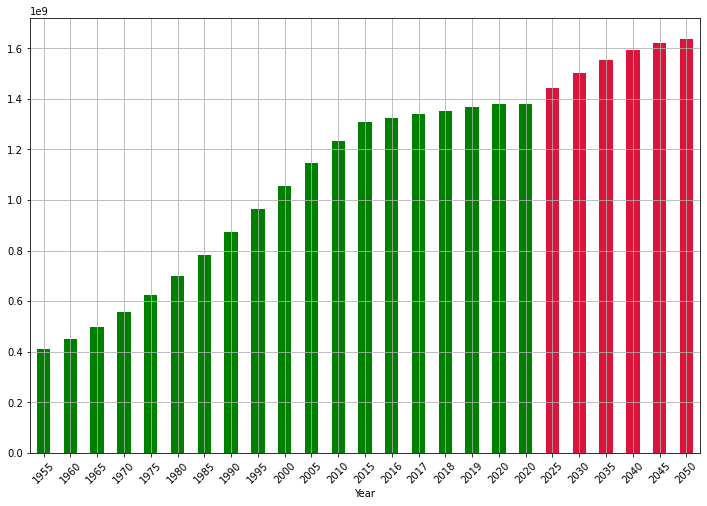

In [47]:
new_df['positive'] = new_df.index < 2025
new_df['Population'].sort_values(ascending = True).plot(kind='bar', rot = 45, 
            color = new_df.positive.map({True:'green',False:'crimson'}),
            figsize = (12,8), grid = True)
plt.show()

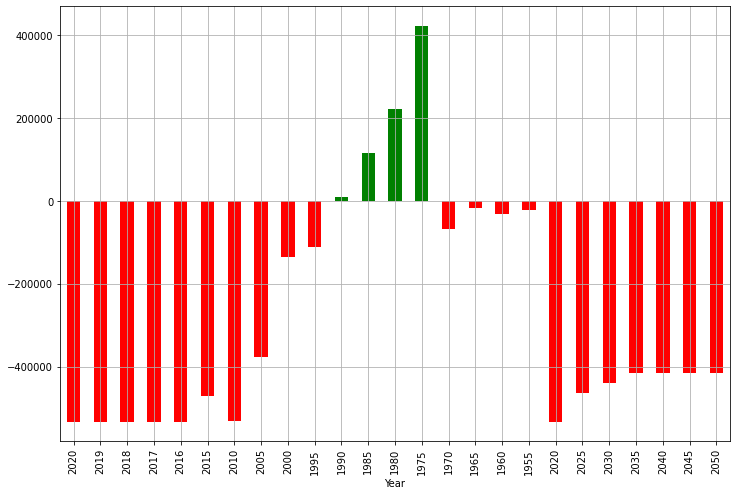

In [53]:
new_df['positive'] = new_df['Migrants (net)'] > 0
new_df['Migrants (net)'].plot(kind = 'bar', 
            color = new_df.positive.map({True: 'green', False: 'red'}), grid = True,
            figsize = (12,8))
plt.show()

**Urban Population Vs  Country Population**

<AxesSubplot:title={'center':'Urban population VS country population'}, xlabel='Year'>

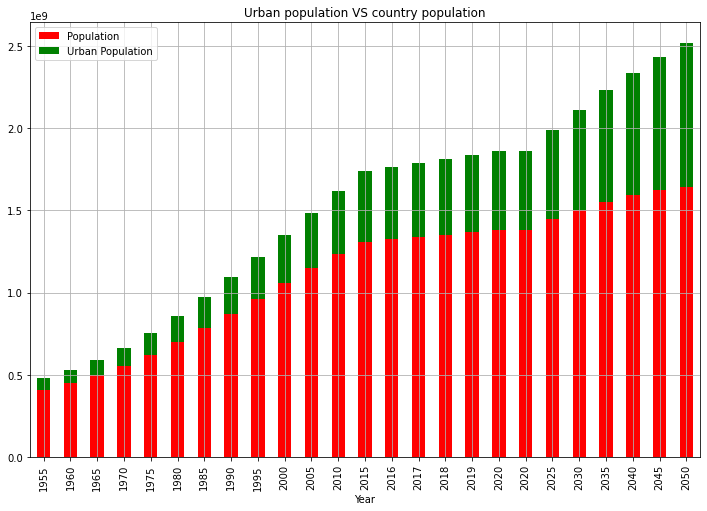

In [51]:
new_df[['Population','Urban Population']].sort_values('Population', ascending = True).plot.bar(stacked=True, color = ['red','green'],
        title='Urban population VS country population', figsize = (12,8), grid = True)